In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [7]:
# Number of agents in the network
num_agents = 1000

# Probability of an agent adopting the new idea if they are connected to at least one adopter
p_adoption = 0.3

# Probability of an agent adopting the new idea if they are not connected to any adopters
p_adoption_isolated = 0.1

# Maximum number of time steps in the simulation
max_timesteps = 100

# Create the network
G = nx.erdos_renyi_graph(num_agents, 0.1)

# Assign a random initial state (adopted/not adopted) to each agent
states = np.random.choice([0, 1], num_agents)

# Assign a random level of influence to each agent
influence = np.random.uniform(0, 1, num_agents)

In [8]:
def update_states(G, states, influence, p_adoption, p_adoption_isolated):
    """
    Update the states of the agents based on the adoption rules.

    Parameters:
    - G: NetworkX graph representing the social network
    - states: NumPy array of integers (0/1) representing the current state (not adopted/adopted) of each agent
    - influence: NumPy array of floats representing the level of influence of each agent
    - p_adoption: Probability of an agent adopting the new idea if they are connected to at least one adopter
    - p_adoption_isolated: Probability of an agent adopting the new idea if they are not connected to any adopters

    Returns:
    - updated_states: NumPy array of integers (0/1) representing the updated state of each agent
    """
    updated_states = states.copy()
    for i in range(len(states)):
        # If the agent is already an adopter, there is no change
        if states[i] == 1:
            continue

        # Check if the agent is connected to any adopters
        neighbors = [n for n in G.neighbors(i) if states[n] == 1]
        num_adopters = len(neighbors)

        # Roll the dice to see if the agent will adopt
        if num_adopters > 0:
            adopt_prob = p_adoption
        else:
            adopt_prob = p_adoption_isolated

        if np.random.uniform() < adopt_prob:
            updated_states[i] = 1

    return updated_states


In [9]:
# Initialize the list to store the number of adopters at each time step
adopters = []

# Run the simulation
for t in range(max_timesteps):
    states = update_states(G, states, influence,
                           p_adoption, p_adoption_isolated)
    adopters.append(np.sum(states))

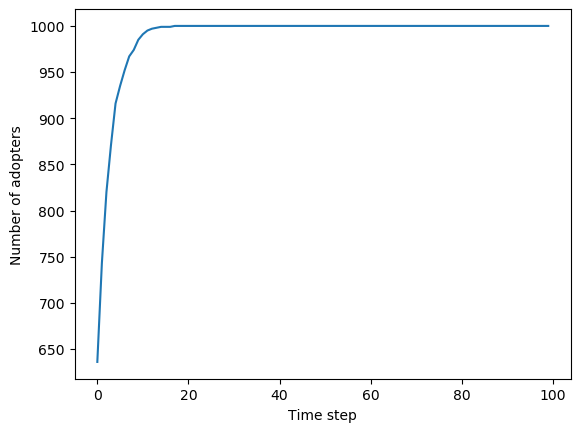

In [10]:
# Plot the results
plt.plot(adopters)
plt.xlabel('Time step')
plt.ylabel('Number of adopters')
plt.show()